In [1]:
import pandas as pd
train_df=pd.read_csv('kaggle_data/train.csv')
test_df=pd.read_csv('kaggle_data/test.csv')
train_df
train_df.shape,test_df.shape
import numpy as np
train_df=train_df.astype(np.float32)
test_df=test_df.astype(np.float32)
train_df_y=train_df.iloc[:,0]
train_df_X=train_df.iloc[:,1:]
train_df_X.shape,train_df_y.shape
train_np_X=train_df_X.values
test_np_X=test_df.values
train_np_X=train_np_X.reshape([42000,1,28,28])
test_np_X=test_np_X.reshape([28000,1,28,28])
train_np_X.shape,test_np_X.shape
train_np_X=(train_np_X/255-0.5)/0.5
test_np_X=(test_np_X/255-0.5)/0.5
train_np_X[0]
train_df_y=pd.get_dummies(train_df_y)
train_df_y=train_df_y.astype(np.float32)
train_df_y
train_np_y=train_df_y.values
train_np_y.shape
import torch
train_X=torch.from_numpy(train_np_X)
test_X=torch.from_numpy(test_np_X)
train_y=torch.from_numpy(train_np_y)
from torch.utils.data import TensorDataset
train_set=TensorDataset(train_X,train_y)
test_set=TensorDataset(test_X) # 可以打印一下，这个构造成的是第二个元素为空的 tuple
from torch.utils.data import DataLoader
train_loader=DataLoader(train_set,batch_size=64,shuffle=True)
test_loader=DataLoader(test_set,batch_size=64,shuffle=True)
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,6,5,padding=2)
        self.conv2=nn.Conv2d(6,16,5)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(400,120)
        self.fc2=nn.Linear(120,84)
        self.out=nn.Linear(84,10)
    def forward(self,x):
        x=self.pool(torch.tanh(self.conv1(x)))
        x=self.pool(torch.tanh(self.conv2(x)))
        x=x.reshape(-1,self.num_flat_features(x))
        x=torch.tanh(self.fc1(x))
        x=torch.tanh(self.fc2(x))
        x=torch.softmax(self.out(x),dim=-1)
        return x
    def num_flat_features(self, x):
        size=x.size()[1:]
        num_features=1
        for s in size:
            num_features*=s
        return num_features
cnn=CNN()
cnn
device=torch.device('cuda:0')
cnn=cnn.to(device)
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn.parameters())
costs=[]
for epoch in range(5):
    cost=0.0
    for i,train in enumerate(train_loader):
        X_train,y_train=train
        X_train=X_train.to(device)
        y_train=y_train.to(device)
        optimizer.zero_grad()
        y_pred=cnn(X_train)
        loss=criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    costs.append(cost)
    print('[%d] cost: %.3f'%(epoch+1,cost))
print('Finished Training')

[1] cost: 1041.142
[2] cost: 979.958
[3] cost: 974.502
[4] cost: 971.584
[5] cost: 969.382
Finished Training


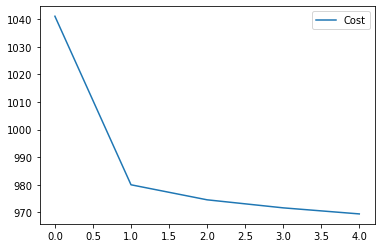

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
plt.figure('PyTorch_CNN_Cost')
plt.plot(costs,label='Cost')
plt.legend()

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
加入允许冗余就好了，plt它会阻塞，但是不给你报错，所以都看不出来是这个问题
只能上网去查
torch和conda之间冗余太多了，很烦人
以后每次写东西一定记得第一句上来就开冗余
另外 ipynb 里 show 是多余的 plot 就已经画出来了，而且 legend 啥后期添也是可以的，一个 cell 里就行  